<a href="https://colab.research.google.com/github/jaeseonim/my-ai-journey/blob/main/karpathy-ai-study/01_micrograd_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline 뜻: 그래프를 시각적으로 보여줘라. 코랩에서는 필요 없긴 해.
%matplotlib inline

In [ ]:
# 스칼라를 입력으로 받는 함수
def f(x):
  return 3*x**2 -4*x + 5

In [ ]:
f(3.0)

20.0

In [ ]:
# np.arange 공식 링크: https://numpy.org/devdocs/reference/generated/numpy.arange.html
# 왜 파이썬 range 대신 이걸 쓰나?
# 파이썬 range()는 정수만 다룰 수 있어
# np.arange()는 0.1 단위처럼 소수점 간격으로 숫자를 생성할 수 있어서 그래프 그릴 때 훨씬 유용함!
xs = np.arange(-5, 5, 0.25)
ys = f(xs)

In [ ]:
# 5는 포함되지 않음
print(xs)

[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]


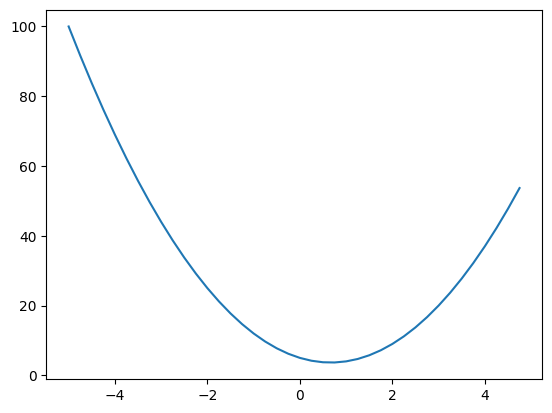

In [ ]:
plt.plot(xs, ys)

In [ ]:
# 저 x값마다의 도함수 값을 어떻게 구할까?
# 보통 수학 시간에는 f(x)의 도함수를 구했지
# 근데, 딥러닝에서는 도함수를 직접 구하는 건 미친 짓
# 이렇게 하지 않고 도함수의 정의부터 다시 살펴보자

$$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$

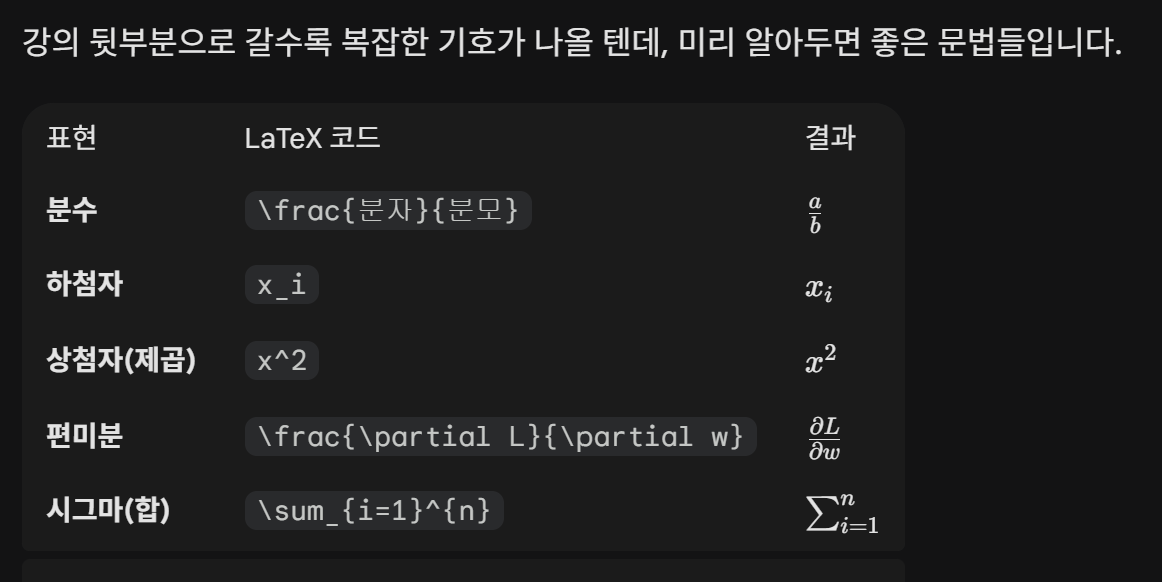

In [ ]:
# 본질은, 아주 극소량 값인 h을 x에 대하여 변화시켰을 때 f(x)가 어떻게 반응하는지다.

In [ ]:
h = 0.0001
x = 3.0
f(x+h)

20.001400030000006

In [ ]:
{f(x + h) - f(x)} / h

TypeError: unsupported operand type(s) for /: 'set' and 'float'

In [ ]:
3 / 2

1.5

In [ ]:
# 파이썬에서는 중괄호 안 써...
# h로 normalize한다고 표현함
(f(x+h)-f(x))/h

14.000300000063248

In [ ]:
(f(x+h))

In [ ]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [ ]:
# 아까보다 좀 더 복잡한 함수 다뤄보자

h = 0.001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print('a 변화')
print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

a 변화
d1 4.0
d2 3.997
slope -3.0000000000001137


In [ ]:
h = 0.001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print('b 변화')
print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

b 변화
d1 4.0
d2 4.002
slope 1.9999999999997797


In [ ]:
h = 0.001

a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('c 변화')
print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

c 변화
d1 4.0
d2 4.0009999999999994
slope 0.9999999999994458


In [ ]:
# neural network는 복잡한 수학식의 복합체
# 따라서 이러한 표현식을 유지할 'data structures'가 필요함

In [ ]:
# 그냥 숫자 2.0이라고 하면 되지 왜 Value(2.0)이라는 객체로 감싸지?
# 이 숫자는 자신이 어디서 왔는지, 나중에 미분값은 얼마인지 등을 기억할 수 있는 똑똑한 존재가 된다!
# a = Value()라고만 하면 에러가 떠. 2.0을 지정해줘야 함.

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
# ;는 두 줄을 한 줄에 쓰기 위한 것
# e.label이라고 나중에 변수 지정해도 됨
e = a*b; e.label = 'e'
d = e+c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
d

# a,b,c는 입력 데이터나 가중치
# e,d는 중산 연산 결과
# 입력 데이터는 바뀌지 않겠지만, 우리는 역전파 통해서 손실함수 최소화하는 방향으로 가중치를 조절함

Value(data=4.0)

In [ ]:
# Value 객체는 숫자를 담을 수 있게 되었다.
# 하지만 이 객체들끼리 더하거나 곱하는 법을 모름

In [ ]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [ ]:
d._op

'+'

In [ ]:
# 시각화 차례
# graphviz라는 오픈소스 툴 사용
# https://graphviz.org/
# _label이라는 걸 Value 객체에 더해주자
# 밑의 코드는 그냥 가져오자

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

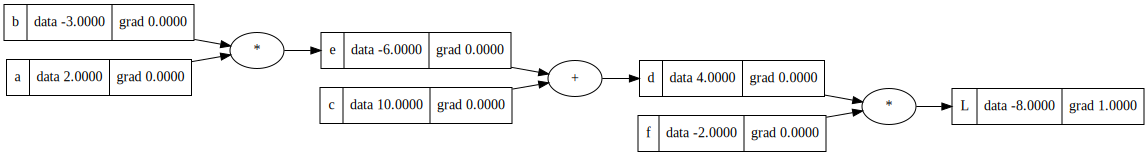

In [ ]:
# 사각형은 객체
# 동그라미는 객체는 아니고 연산자 보여주는 것!
# 리프노드: _prev가 텅 비어 있는 시조새 노드
# 입력데이터와 가중치는 리프노드! 중간에 있는건 연산 결과
# w2도 부모를 확인하면 아무도 없음...

draw_dot(L)

In [ ]:
# L의 L에 대한 미분 -> 직관적으로 생각해도 1이다.
# manually하게 1.0으로 fix시킨다
L.grad = 1.0

# 나머지에 대한 grad는 어떻게 구할까?
# 일단 L 바로 뒤에 있는 d,f를 보자. * 연산으로 되어 있다. 미분 공식을 떠올려보면, 각각의 grad는 서로 반대의 입력값으로부터 온다는 것을 알 수 있다.
d.grad = 1.0 * -2.0
f.grad = 1.0 * 4.0
# 그 다음 c, e에 대한 grad를 구하자. L은 저 건너치 있는데 어떻게 구하지? 여기서 바로 chain rule이 나온다.
# + 연산자로 되어 있을 때는 grad가 그냥 전해져서 흘러온다. 이때, grad가 뒤에서 앞으로 흘러온다. 이를 보고 '역전파(backpropagation)'이라고 한다.
e.grad = -2.0
c.grad = -2.0
# a, b도 마찬가지.
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0
#실제로 이를 구하고 싶다면? h=0.001로 두고 계산해보면 된다. 결과는 같다

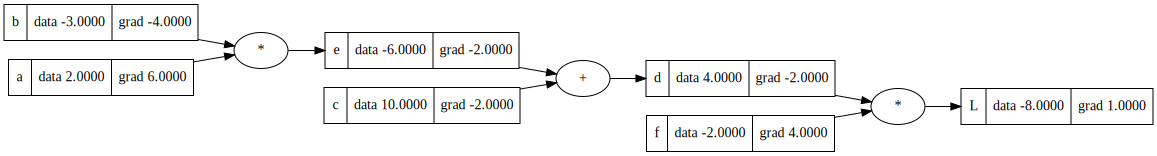

In [ ]:
draw_dot(L)

In [ ]:
# 순방향도 살펴보자
# leaf node에 대해서만
# 카파시는 '손실(Loss)'을 줄이는 학습을 하는 게 아니라, 단순히 "기울기(grad)를 이용해서 결과값 L을 더 크게 만들어보자"라는 실험을 하고 있음
# 기울기(Gradient)의 정의: 어떤 변수를 아주 조금 키웠을 때, 결과값이 어느 방향으로 커지는지를 알려주는 나침반입니다.
# 카파시의 의도: "자, 이 미분값이 우리에게 L이 커지는 방향을 알려줬으니, 그 방향 그대로(+) 가보자. 그러면 진짜로 L이 커질까?"를 확인시켜 주는 과정입니다.
# 따라서 L.data를 키우고 싶을 때는 +를 쓰는 것이 수학적으로 맞습니다.


a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


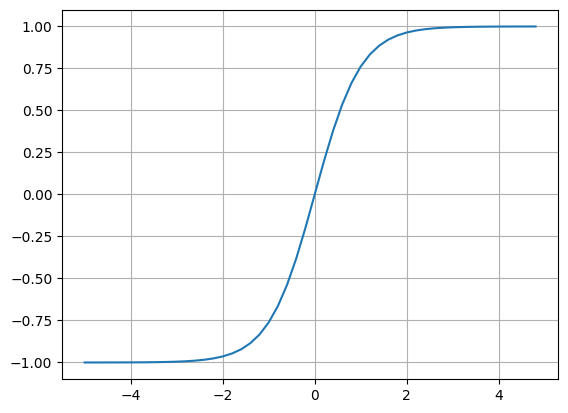

In [ ]:
# tanh 함수 구현
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

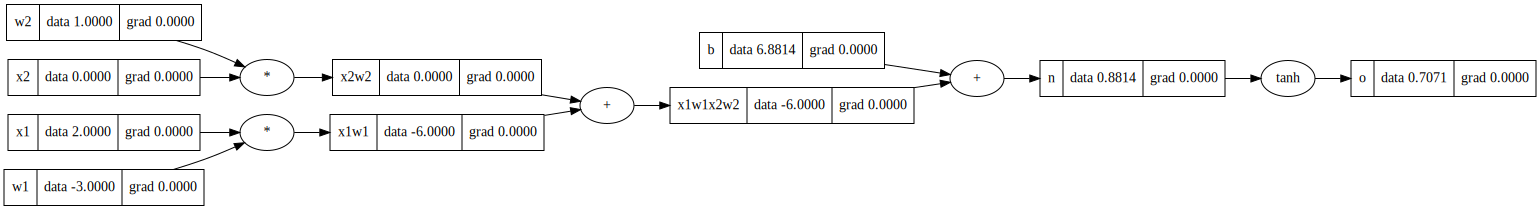

In [ ]:
draw_dot(o)

In [ ]:
1 - o.data**2

0.4999999999999999

In [ ]:
# 위의 방식처럼 수동으로 grad 지정하는 건 비효율적임
# 그래서 이제 자동으로 계산하는 코드를 짤거임

In [ ]:
# micrograd의 Value object를 만들어보자

class Value:

  # data를 객체 생성 때 입력하는 순간 self.data에 저장함
  # _children=() -> 이 놈의 조상이 누군지 확인하기 위함
  # _는 내부 부품이라는 얘기. 수정하면 시스템이 망가지니 건드리지 마라.
  # ()는 인자를 넣지 않아도 오류가 나지 않게 하기 위한 기본값 설정임
  # 만약 인자 넣지 않으면? 빈 튜플이 되고, 이것이 set() 함수를 통과하면서 빈 집합이 된다
  # _op=''는 이 숫자가 어떤 연산 통해 prev로부터 왔는지 알게 해준다
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0
    # 파이썬 함수 만들 때 def 함수이름(): 쓰지만
    # 한 줄로 끝나는 아주 간단한 함수 만들 때는 lambda를 씀
    # lambda: None의 의미 -> 입력받는 인자도 없고 실행해도 아무 값도 돌려주지 않음
    # lambda는 이름표조차 붙일 필요 없는 가벼운 일회용 함수 만들 때 쓴다
    self._backward = lambda: None
    # 왜 집합으로 만들지? 효율성 때문
    # 부모가 두 놈이면 한 명만 남기도록 하기 위해서
    self._prev = set(_children)
    self._op = _op
    self.label = label

  # 객체의 이름표임. 코랩에서 a를 입력하고 실행했을 때 우리가 보기 편하게 내용을 출력해줌.
  # 만약 없으면? 이상한 흉한 값이 튀어나옴
  def __repr__(self):
    # f-string에서 중괄호 {}는 이 안에 있는 변수를 실제 값으로 바꿔서 출력해줘라는 약속임
    return f"Value(data={self.data})"

  # __add__ 와 __mul__은 파이썬의 특수 메서드
  # 두 객체 사이에 + 기호가 있으면 자동으로 __add__ 함수 찾아 실행함

  def __add__(self, other):
    # 새로운 Value 객체를 만들어
    out = Value(self.data + other.data, (self, other), '+')

    # out은 바로 윗줄에 있는 out이구만
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    # _backward라는 변수는 def로 정의한 따끈따끈한 함수 그 자체를 가리킵니다.
    out._backward = _backward

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)

    # tanh는 숫자 하나만 있으면 계산이 끝나는 함수라서 (self, )라고 적음
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  # _backward가 아닌 실제 backward 함수를 정의해보자
  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


In [ ]:
# 이제는 neural network의 아주 간단한 모델을 구현해보자!
# 활성화함수가 존재해야 해 -> tanh 함수를 쓸 것. Value 객체에 tanh를 구현해야 함
# tanh 함수: 데이터를 -1에서 1 사이로 매끄럽게 압축해주는 활성화함수

# input x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neruon
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [ ]:
# 이제 아까 했던 것처럼, o에 대한 각각의 변수에 대한 미분값을 구해야 함

# o = tanh(n)
# do/dh = 1 - o**2

# o.grad = 1
# n.grad = 0.5
# b.grad = 0.5
# x1w1x2w2.grad = 0.5
# x1w1.grad = 0.5
# x2w2.grad = 0.5
# x1.grad = 0.5 * -3.0
# w1.grad = 0.5 * 2.0
# x2.grad = 0.5 * 1.0
# # 밑 식은 직관적으로도 이해 가능
# w2.grad = 0.5 * 0.0

In [ ]:
# 이제 자동으로
o.grad = 1.0
# n.grad가 0.5로 바뀐다
# 애초에 o = n.tanh()할 때, o._backward() 함수는 n.tanh 안의 backward 함수를 통해 계산되도록 설계됨
o._backward()

In [ ]:
n._backward()

In [ ]:
# 아무것도 일어나지 않는다. 에러도 일어나지 않는다. None
b._backward()

In [ ]:
x1w1x2w2._backward()

In [ ]:
x1w1._backward()
x2w2._backward()

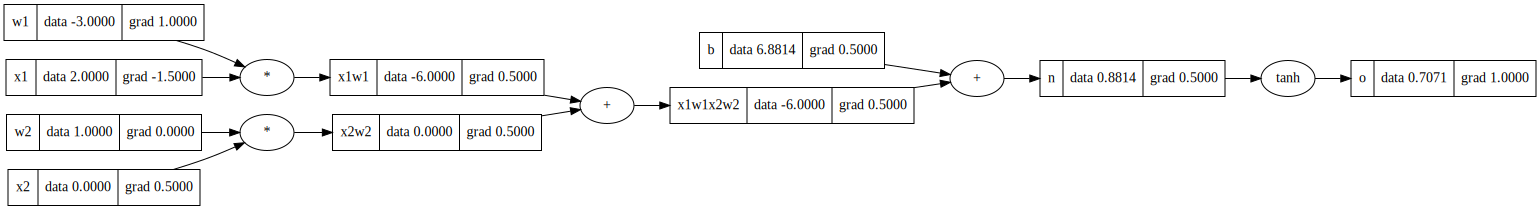

In [ ]:
draw_dot(o)

In [ ]:
# topological sort graph 구현
# "위상 정렬은 뒤에 있는 노드가 미분값을 다 계산해서 나에게 줄 때까지 기다렸다가 내 차례가 왔을 때 실행되도록 순번 대기표를 뽑아주는 과정입니다."
# 위상 정렬은 **방향성이 있고 순환이 없는 그래프(DAG)**에서만 가능합니다.

o.grad = 1.0

topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
# topo 리스트에는 [입력 노드들, ..., 중간 노드들, 출력 노드 o] 순서로 줄을 서게 됩니다.
build_topo(o)

# reversed(topo)를 하면 [출력 노드 o, ..., 중간 노드들, 입력 노드들] 순서가 됩니다.
for node in reversed(topo):
  node._backward()

# 이 코드를 Value 클래스 안에 집어넣자


In [ ]:
o.backward()

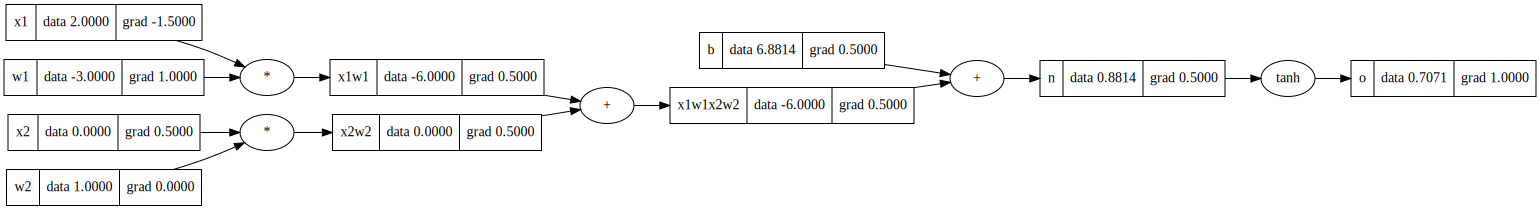

In [ ]:
# backward 호출 후에 잘 되었는지 확인
draw_dot(o)

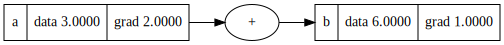

In [ ]:
# 에러 확인
# a.grad = 2.0이 되어야 하는데 1.0으로 나타남
# 변수가 두 번 이상 사용되면 말 그대로 '변수' 발생
# 해결책 -> self.grad = ~ 를 self.grad += 로 바꾸기 -> 'accumulation'
a = Value(3.0, label='a')
b = a + a; b.label = 'b'
b.backward()
draw_dot(b)

2/11 다시 시작

In [3]:
# micrograd의 Value object를 만들어보자

class Value:

  # data를 객체 생성 때 입력하는 순간 self.data에 저장함
  # _children=() -> 이 놈의 조상이 누군지 확인하기 위함
  # _는 내부 부품이라는 얘기. 수정하면 시스템이 망가지니 건드리지 마라.
  # ()는 인자를 넣지 않아도 오류가 나지 않게 하기 위한 기본값 설정임
  # 만약 인자 넣지 않으면? 빈 튜플이 되고, 이것이 set() 함수를 통과하면서 빈 집합이 된다
  # _op=''는 이 숫자가 어떤 연산 통해 prev로부터 왔는지 알게 해준다
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0
    # 파이썬 함수 만들 때 def 함수이름(): 쓰지만
    # 한 줄로 끝나는 아주 간단한 함수 만들 때는 lambda를 씀
    # lambda: None의 의미 -> 입력받는 인자도 없고 실행해도 아무 값도 돌려주지 않음
    # lambda는 이름표조차 붙일 필요 없는 가벼운 일회용 함수 만들 때 쓴다
    self._backward = lambda: None
    # 왜 집합으로 만들지? 효율성 때문
    # 부모가 두 놈이면 한 명만 남기도록 하기 위해서
    self._prev = set(_children)
    self._op = _op
    self.label = label

  # 객체의 이름표임. 코랩에서 a를 입력하고 실행했을 때 우리가 보기 편하게 내용을 출력해줌.
  # 만약 없으면? 이상한 흉한 값이 튀어나옴
  def __repr__(self):
    # f-string에서 중괄호 {}는 이 안에 있는 변수를 실제 값으로 바꿔서 출력해줘라는 약속임
    return f"Value(data={self.data})"

  # __add__ 와 __mul__은 파이썬의 특수 메서드
  # 두 객체 사이에 + 기호가 있으면 자동으로 __add__ 함수 찾아 실행함

  def __add__(self, other):
    # 그냥 상수가 더해질 수도 있으니
    # isinstance: otehr가 Value면 그대로 쓰고(other), 그냥 숫자라면 Value로 포장해라
    # if else를 한 줄로 쓴 코드 !
    other = other if isinstance(other, Value) else Value(other)
    # 새로운 Value 객체를 만들어
    out = Value(self.data + other.data, (self, other), '+')

    # out은 바로 윗줄에 있는 out이구만
    # +=를 하는 이유: b = a + a 가 있을 때를 대비해서. 하지만 초기화 되어야 해 이에 대해서는 나중에 또 다룸.
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    # _backward라는 변수는 def로 정의한 따끈따끈한 함수 그 자체를 가리킵니다.
    out._backward = _backward

    return out

  def __radd__(self, other): # other + self 위해서
    return self + other

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  # 나눗셈을 위한 거듭제곱 함수 구현
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out

  def __rmul__(self, other): # other * self 위해서
    return self * other

  # 나눗셈을 정의할 때 곱셈으로 정의해버려

  def __truediv__(self, other):
    # 거듭제곱이 연산 우선순위라서 괄호 안 씌워도 된다
    # 거듭제곱 또한 구현해야 해...power function! ㅡ
    return self * other**-1

  # 뺼셈도 정의하자
  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)

    # tanh는 숫자 하나만 있으면 계산이 끝나는 함수라서 (self, )라고 적음
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  # tanh 을 손수 구현을 해보자. 그럴려면 exp와 나눗셈 정의해야 해.
  # 나눗셈은 저 위에 있음
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward

    return out

  # _backward가 아닌 실제 backward 함수를 정의해보자
  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [4]:
# 시각화 차례
# graphviz라는 오픈소스 툴 사용
# https://graphviz.org/
# _label이라는 걸 Value 객체에 더해주자
# 밑의 코드는 그냥 가져오자

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [ ]:
# input x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neruon
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

In [ ]:
o.backward()

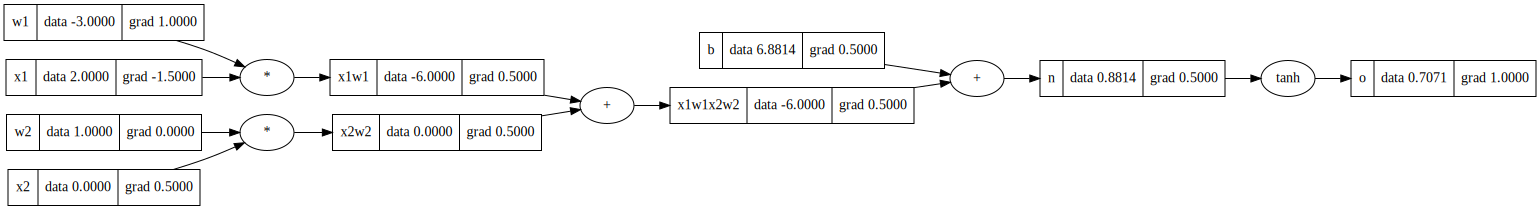

In [ ]:
draw_dot(o)

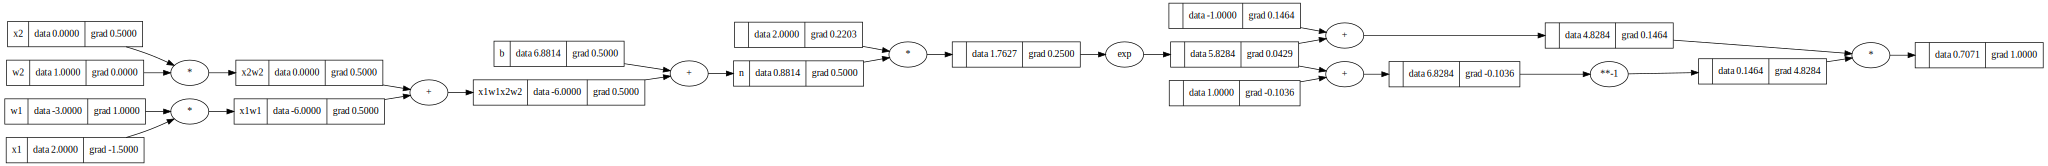

In [ ]:
# tanh 함수 직접 구현해보자
# 이제는 neural network의 아주 간단한 모델을 구현해보자!
# 활성화함수가 존재해야 해 -> tanh 함수를 쓸 것. Value 객체에 tanh를 구현해야 함
# tanh 함수: 데이터를 -1에서 1 사이로 매끄럽게 압축해주는 활성화함수

# input x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neruon
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1x2w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.backward()
draw_dot(o)

In [ ]:
print(o.data)

0.7071067811865477


이제 pytorch를 살펴볼 차례

In [ ]:
import torch

In [ ]:
torch.Tensor([1,2,3]).shape

# 이거는 그냥 size가 3이라고 떠
# 근데 곱셈할 때는 torch가 영리하게 반응해. 만약 이게 왼쪽에 있으면 행벡터로 인식. 오른쪽에 있으면 열벡터로 인식.
# 만약에 아구 안맞아서 곱셈이 안 된다면, 행렬을 전치해줘야해.

torch.Size([3])

In [ ]:
# shape
torch.Tensor([[1,2,3],[4,5,6]]).shape

torch.Size([2, 3])

In [ ]:
# 차원
torch.Tensor([[1,2,3],[4,5,6]]).dim()

2

강의에서 왜 굳이 .double()을 썼을까?
안드레 카파시가 굳이 이 코드를 넣은 이유는 "파이썬 기본 숫자와의 일관성" 때문입니다.

파이썬의 기본값: 우리가 파이썬에서 그냥 a = 2.0이라고 쓰면, 파이썬은 내부적으로 이를 자동으로 **64비트(Double)**로 저장합니다.

PyTorch의 기본값: 반면 PyTorch 텐서는 딥러닝 연산 속도를 높이기 위해 기본적으로 **32비트(Float)**를 사용합니다. (칸이 작아야 계산이 빠르거든요!)

문제 발생: micrograd는 순수 파이썬으로 만들었으니 64비트로 계산하겠죠? 그런데 PyTorch는 32비트로 계산하면, 소수점 아주 먼 뒷자리에서 미세한 반올림 오차가 발생합니다.

💡 결론: "내가 만든 micrograd 계산 결과랑 PyTorch 계산 결과가 소수점 끝자리까지 완벽하게 똑같은지 확인시켜 줄게! 그러려면 PyTorch도 파이썬처럼 정밀한 Double 모드로 바꿔야 해." 라는 뜻입니다.

In [ ]:
# micrograd는 스칼라값을 Value의 input값으로 받아
# 하지만 pytorch에서는? tensor를 받는다. 텐서 두려워하지 마라. 그저 스칼라의 n차원 array일 뿐이다.
# 파이썬 기본 list vs. numpy의 array / torch의 tensor는 다르다!
# double()의 의미는 위에 써놓음
# requires_grad = True 의미: 보통 텐서는 메모리 아끼기 위해 미분값 구하지 않는데, 여기서는 역전파 위해서 구해야하니깐 True로 세팅
# 여기서는 애초에 Value를 쓰는게 아니라, torch의 Tensor라는 클래스 쓰는중
# micrograd처럼 pytorch의 Tensor에도 data와 grad라는 속성이 있어

x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

# 위에서는 그냥 o.data하면 보여줬지만, 여기서는 item()이라는 함수를 써야 함
print('o.data', o.data.item())
o.backward()

print('---')
print('x2.grad', x2.grad.item())
print('w2.grad', w2.grad.item())
print('x1.grad', x1.grad.item())
print('w1.grad', w1.grad.item())

o.data 0.7071066904050358
---
x2.grad 0.5000001283844369
w2.grad 0.0
x1.grad -1.5000003851533106
w1.grad 1.0000002567688737


In [ ]:
o

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)

pytorch의 장점. 텐서 연산이 가능 -> 병렬 연산 대규모로 가능!

그냥 메모. mlp는 은닉층 하나 이상이면서, 비선형함수가 있어야 함

근데 딥러닝은 보통 은닉층 2개 이상인 거를 말 해.

은닉층 하나인 MLP를 2-LAYER MLP라고 한다고 Gemini가 답함

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline 뜻: 그래프를 시각적으로 보여줘라. 코랩에서는 필요 없긴 해.
%matplotlib inline
import random

In [54]:
# micrograd의 Value object를 만들어보자

class Value:

  # data를 객체 생성 때 입력하는 순간 self.data에 저장함
  # _children=() -> 이 놈의 조상이 누군지 확인하기 위함
  # _는 내부 부품이라는 얘기. 수정하면 시스템이 망가지니 건드리지 마라.
  # ()는 인자를 넣지 않아도 오류가 나지 않게 하기 위한 기본값 설정임
  # 만약 인자 넣지 않으면? 빈 튜플이 되고, 이것이 set() 함수를 통과하면서 빈 집합이 된다
  # _op=''는 이 숫자가 어떤 연산 통해 prev로부터 왔는지 알게 해준다
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0
    # 파이썬 함수 만들 때 def 함수이름(): 쓰지만
    # 한 줄로 끝나는 아주 간단한 함수 만들 때는 lambda를 씀
    # lambda: None의 의미 -> 입력받는 인자도 없고 실행해도 아무 값도 돌려주지 않음
    # lambda는 이름표조차 붙일 필요 없는 가벼운 일회용 함수 만들 때 쓴다
    self._backward = lambda: None
    # 왜 집합으로 만들지? 효율성 때문
    # 부모가 두 놈이면 한 명만 남기도록 하기 위해서
    self._prev = set(_children)
    self._op = _op
    self.label = label

  # 객체의 이름표임. 코랩에서 a를 입력하고 실행했을 때 우리가 보기 편하게 내용을 출력해줌.
  # 만약 없으면? 이상한 흉한 값이 튀어나옴
  def __repr__(self):
    # f-string에서 중괄호 {}는 이 안에 있는 변수를 실제 값으로 바꿔서 출력해줘라는 약속임
    return f"Value(data={self.data})"

  # __add__ 와 __mul__은 파이썬의 특수 메서드
  # 두 객체 사이에 + 기호가 있으면 자동으로 __add__ 함수 찾아 실행함

  def __add__(self, other):
    # 그냥 상수가 더해질 수도 있으니
    # isinstance: otehr가 Value면 그대로 쓰고(other), 그냥 숫자라면 Value로 포장해라
    # if else를 한 줄로 쓴 코드 !
    other = other if isinstance(other, Value) else Value(other)
    # 새로운 Value 객체를 만들어
    out = Value(self.data + other.data, (self, other), '+')

    # out은 바로 윗줄에 있는 out이구만
    # +=를 하는 이유: b = a + a 가 있을 때를 대비해서. 하지만 초기화 되어야 해 이에 대해서는 나중에 또 다룸.
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    # _backward라는 변수는 def로 정의한 따끈따끈한 함수 그 자체를 가리킵니다.
    out._backward = _backward

    return out

  def __radd__(self, other): # other + self 위해서
    return self + other

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  # 나눗셈을 위한 거듭제곱 함수 구현
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out

  def __rmul__(self, other): # other * self 위해서
    return self * other

  # 나눗셈을 정의할 때 곱셈으로 정의해버려

  def __truediv__(self, other):
    # 거듭제곱이 연산 우선순위라서 괄호 안 씌워도 된다
    # 거듭제곱 또한 구현해야 해...power function! ㅡ
    return self * other**-1

  # 뺼셈도 정의하자
  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)

    # tanh는 숫자 하나만 있으면 계산이 끝나는 함수라서 (self, )라고 적음
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  # tanh 을 손수 구현을 해보자. 그럴려면 exp와 나눗셈 정의해야 해.
  # 나눗셈은 저 위에 있음
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward

    return out

  # _backward가 아닌 실제 backward 함수를 정의해보자
  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [55]:
# 시각화 차례
# graphviz라는 오픈소스 툴 사용
# https://graphviz.org/
# _label이라는 걸 Value 객체에 더해주자
# 밑의 코드는 그냥 가져오자

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [56]:
# Value class 랑 그래프 그리는 코드는 동일하게 실행
# Neuron class를 만들자

class Neuron:

  # nin은 Neuron이 받을 입력의 개수
  # neuron 하나하나에 입력의 개수만큼 w와 b가 쌍으로 존재한다고 생각하자!!! 그 각각에 대해 grad도 존재
  def __init__(self, nin):
    # 입력 개수만큼 w가 필요해. 리스크 컴프리헨션으로 만들어버려.
    # random.uniform -> -1~1 사이의 임의의 실수
    # for _ in range -> i 같은 변수에는 관심 없이 그냥 특정 행위만 반복하려고 할 때 쓰는 코드
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    # w * x + b
    # zip(): w와 x를 짝지어줌
    # act = sum(wi*xi for wi, xi in zip(self.w, x)) + self.b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out

  def parameters(self):
    return self.w + [self.b]

# layer는 neuron을 담는 그릇
class Layer:

  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  # __call__ -> 따로 함수 이름 적을 필요 없이 그저 ( ) 하면 된다
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    # 1 -> 알맹이만 꺼내고 싶어서라고 추측 중
    return outs[0] if len(outs) == 1 else outs

  # 리스트 컴프리헨션 중첩
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:

  # nin은 똑같지만 nout's'에 s가 붙어.
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

In [28]:
# 3 -> 4 -> 4 _> 1 MLP를 만들고 싶어
# input data에 대한 grad는 사실 쓸모가 없어
# x = [2.0, 3.0, -1.0]
# n = MLP(3, [4, 4, 1])
# n(x)

Value(data=0.1150832643877895)

In [31]:
len(n.parameters())

41

In [57]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [62]:
for k in range(20):

  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout-ygt) ** 2 for ygt, yout in zip(ys, ypred))

  # backward pass
  # 그치, 당연히 초기화해줘야지...
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()

  # update
  # len(n.parameters) = 41
  for p in n.parameters():
    # grad의 방향은 loss를 증가시키는 방향으로 향해 있다
    # learning rate를 0.01에서 0.1로 바꾸면? 더 빨리 data가 grad에 대하여 업데이트되는 느낌. 하지만 단점은, overstep할 수 있음.
    p.data += -0.05 * p.grad

  print(k, loss.data)

0 1.5443607656071577e-11
1 1.5443607645601338e-11
2 1.544360763774866e-11
3 1.5443607628150942e-11
4 1.544360762029826e-11
5 1.5443607610700543e-11
6 1.5443607602847865e-11
7 1.5443607593250147e-11
8 1.544360758539747e-11
9 1.5443607575788015e-11
10 1.5443607566190297e-11
11 1.5443607558337616e-11
12 1.5443607548739897e-11
13 1.544360754088722e-11
14 1.54436075312895e-11
15 1.5443607523436824e-11
16 1.544360751381563e-11
17 1.5443607505090433e-11
18 1.5443607495492714e-11
19 1.5443607487640033e-11


In [64]:
# 학습 후 ypred 확인해보니, ys와 매우 유사함
ypred

[Value(data=0.9999999999433122),
 Value(data=-0.9999999471437397),
 Value(data=-0.99999607051992),
 Value(data=0.9999999999661665)]

데이터 수가 여기선 4개여서, 이 4개를 모두 forward 패스한다음에 loss를 이들을 더했지만,

만약에 데이터 수가 엄청 많으면? 그중에 일부만 뽑아서 수행한다. 이를 mini batch 학습이라고 한다.